In [ ]:
def suggest_crops(temperature, pH, moisture, soil_type, month):
    suitable_crops = []

    if 12 <= temperature <= 25 and 5.5 <= pH <= 7.5 and 35 <= moisture <= 45:
        suitable_crops.append("Wheat")

    if 20 <= temperature <= 40 and 5.0 <= pH <= 7.5 and 80 <= moisture <= 90:
        suitable_crops.append("Rice")

    if 12 <= temperature <= 24 and 6 <= pH <= 7 and 50 <= moisture <= 70:
        suitable_crops.append("Tomatoes")

    if 10 <= temperature <= 30 and 6.0 <= pH <= 7.5 and 50 <= moisture <= 70:
        suitable_crops.append("Spinach")

    if 18 <= temperature <= 35 and 5.8 <= pH <= 7.0 and 60 <= moisture <= 80:
        suitable_crops.append("Maize")

    if soil_type == "Sandy Loam":
        suitable_crops.append("Wheat")
        suitable_crops.append("Rice")
    if soil_type == "Clay Loam":
        suitable_crops.append("Tomatoes")
        suitable_crops.append("Spinach")
    if soil_type == "Silt Loam":
        suitable_crops.append("Maize")

    # Adjust crop suggestions based on the month
    if month in [12, 1, 2]:  # Winter season
        suitable_crops = [crop for crop in suitable_crops if crop in ["Wheat"]]
    elif month in [6, 7, 8]:  # Monsoon season
        suitable_crops = [crop for crop in suitable_crops if crop in ["Rice"]]
    elif month in [10, 11]:  # Post-monsoon season
        suitable_crops = [crop for crop in suitable_crops if crop in ["Tomatoes", "Spinach"]]
    else:  # Other seasons
        suitable_crops = [crop for crop in suitable_crops if crop in ["Maize"]]

    return suitable_crops

desired_temperature = 50  # Set your desired temperature in Celsius
desired_pH = 6.0        # Set your desired pH value
desired_moisture = 40.0  # Set your desired moisture percentage
desired_soil_type = "Sandy Loam"  # Set your desired soil type
current_month = int(input("Enter the current month (1-12): "))

print("Desired Temperature:", desired_temperature, "°C")
print("Desired pH:", desired_pH)
print("Desired Moisture:", desired_moisture, "%")
print("Desired Soil Type:", desired_soil_type)

recommended_crops = suggest_crops(desired_temperature, desired_pH, desired_moisture, desired_soil_type, current_month)

if recommended_crops:
    print("Recommended Crops:", ", ".join(recommended_crops))
else:
    print("No suitable crops found for the given parameters.")


Enter the current month (1-12): 11
Desired Temperature: 50 °C
Desired pH: 6.0
Desired Moisture: 40.0 %
Desired Soil Type: Sandy Loam
No suitable crops found for the given parameters.


In [ ]:
def suggest_crops(temperature, pH, moisture, soil_type, season):
    suitable_crops = []

    # Crop-specific conditions for Rabi crops
    if season == "Rabi":
        if 12 <= temperature <= 25 and 5.5 <= pH <= 7.5 and 35 <= moisture <= 45:
            suitable_crops.append("Wheat")

    # Crop-specific conditions for Kharif crops
    if season == "Kharif":
        if 20 <= temperature <= 40 and 5.0 <= pH <= 7.5 and 80 <= moisture <= 90:
            suitable_crops.append("Rice")

    if 12 <= temperature <= 24 and 6 <= pH <= 7 and 50 <= moisture <= 70:
        suitable_crops.append("Tomatoes")

    if 10 <= temperature <= 30 and 6.0 <= pH <= 7.5 and 50 <= moisture <= 70:
        suitable_crops.append("Spinach")

    if 18 <= temperature <= 35 and 5.8 <= pH <= 7.0 and 60 <= moisture <= 80:
        suitable_crops.append("Maize")

    if soil_type == "Sandy Loam":
        suitable_crops.extend(["Wheat", "Rice"])
    if soil_type == "Clay Loam":
        suitable_crops.extend(["Tomatoes", "Spinach"])
    if soil_type == "Silt Loam":
        suitable_crops.append("Maize")

    return suitable_crops

desired_temperature = float(input("Enter temperature (°C): "))
desired_pH = float(input("Enter pH: "))
desired_moisture = float(input("Enter moisture percentage: "))
# desired_soil_type = input("Enter soil type (Sandy Loam, Clay Loam, Silt Loam): ").strip().title()
season = input("Enter the season (Rabi or Kharif): ").strip().title()

recommended_crops = suggest_crops(desired_temperature, desired_pH, desired_moisture, desired_soil_type, season)

if recommended_crops:
    print("Recommended Crops:", ", ".join(recommended_crops))
else:
    print("No suitable crops found for the given parameters.")

Enter temperature (°C): 25
Enter pH: 6
Enter moisture percentage: 50
Enter the season (Rabi or Kharif): rabi
Recommended Crops: Spinach, Wheat, Rice


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Encode the label (crop) into a categorical variable
data['label'] = data['label'].astype('category')
data['label_cat'] = data['label'].cat.codes

# Select features (N, P, K, temperature, humidity, pH, rainfall) and the label
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
label = data['label_cat']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Predict the crop based on user-provided values
desired_values = [90, 42, 43, 25.0, 75.0, 6.5, 200.0]  # Replace with your desired values
predicted_crop = model.predict([desired_values])

# Map the numerical label back to the crop name
crop_mapping = dict(enumerate(data['label'].cat.categories))
suggested_crop = crop_mapping[predicted_crop[0]]
print("Suggested Crop:", suggested_crop)



Model Accuracy: 0.9818181818181818
Suggested Crop: rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Split features and labels
X = data.drop("label", axis=1)  # Features
y = data["label"]  # Labels

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def generate_random_NPK():
    N = random.uniform(0, 100)  # Generate a random value for Nitrogen
    P = random.uniform(0, 100)  # Generate a random value for Phosphorus
    K = random.uniform(0, 100)  # Generate a random value for Potassium
    return N, P, K

def suggest_crop(N, P, K, temperature, humidity, pH, rainfall):
    user_input = [[N, P, K, temperature, humidity, pH, rainfall]]
    prediction = model.predict(user_input)
    return prediction[0]

# Generate random NPK values
N, P, K = generate_random_NPK()

# Collect user input for other parameters
temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
pH = float(input("Enter pH: "))
rainfall = float(input("Enter Rainfall: "))

suggested_crop = suggest_crop(N, P, K, temperature, humidity, pH, rainfall)
print("Generated NPK values - N:{:.2f}, P:{:.2f}, K:{:.2f}".format(N, P, K))
print("Suggested Crop:", suggested_crop)



Enter Temperature: 40
Enter Humidity: 67
Enter pH: 5
Enter Rainfall: 150
Generated NPK values - N:85.44, P:2.46, K:74.68
Suggested Crop: coffee


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Split the dataset into features (X) and target variable (y)
X = data.drop("label", axis=1)
y = data["label"]

# Data preprocessing (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

def recommend_crop(temperature, ph, moisture_level):
    # Generate random values for N, P, K, humidity, and rainfall
    N = np.random.uniform(0, 200)  # Assuming N is between 0 and 200
    P = np.random.uniform(0, 200)  # Assuming P is between 0 and 200
    K = np.random.uniform(0, 200)  # Assuming K is between 0 and 200
    humidity = np.random.uniform(0, 100)  # Assuming humidity is between 0% and 100%
    rainfall = np.random.uniform(0, 300)  # Assuming rainfall is between 0 and 300 mm

    # Combine the randomly generated values with the user input
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Standardize the input data
    input_data = scaler.transform(input_data)

    # Predict the crop
    predicted_crop = model.predict(input_data)

    return predicted_crop[0]

# Example usage
try:
    temperature = float(input("Enter the current temperature (°C): "))
    ph = float(input("Enter the soil pH: "))
    moisture_level = float(input("Enter the moisture level of the soil: "))

    recommended_crop = recommend_crop(temperature, ph, moisture_level)
    print(f"Suggested Crop: {recommended_crop}")

except ValueError:
    print("Please enter valid numeric values for temperature, pH, and moisture level.")


Enter the current temperature (°C): 25
Enter the soil pH: 6
Enter the moisture level of the soil: 40
Suggested Crop: kidneybeans


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model Exclusively for the state of MP ( INDORE )

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("crop_prod_indore.csv")  # Replace with the actual dataset path

data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Madhya Pradesh,INDORE,1997,Kharif,Groundnut,200,200.0
1,Madhya Pradesh,INDORE,1997,Kharif,Jowar,2500,2900.0
2,Madhya Pradesh,INDORE,1997,Kharif,Maize,10900,11600.0
3,Madhya Pradesh,INDORE,1997,Kharif,Soyabean,210700,244700.0
4,Madhya Pradesh,INDORE,1997,Rabi,Linseed,1600,900.0
5,Madhya Pradesh,INDORE,1997,Rabi,Wheat,115700,274200.0
6,Madhya Pradesh,INDORE,1998,Kharif,Arhar/Tur,700,500.0
7,Madhya Pradesh,INDORE,1998,Kharif,Groundnut,100,200.0
8,Madhya Pradesh,INDORE,1998,Kharif,Jowar,1400,1800.0
9,Madhya Pradesh,INDORE,1998,Kharif,Maize,9200,10800.0


In [ ]:
# Filtering the data for 'Wheat' and 'Soyabean' crops
wheat_soyabean_indore_df = data[data['Crop'].isin(['Wheat', 'Soyabean'])]

# Check for available data on temperature, moisture, and pH for 'Wheat' and 'Soyabean' crops
wheat_soyabean_indore_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
3,Madhya Pradesh,INDORE,1997,Kharif,Soyabean,210700,244700.0
5,Madhya Pradesh,INDORE,1997,Rabi,Wheat,115700,274200.0
10,Madhya Pradesh,INDORE,1998,Kharif,Soyabean,214200,259200.0
13,Madhya Pradesh,INDORE,1998,Rabi,Wheat,121800,344900.0
25,Madhya Pradesh,INDORE,1999,Kharif,Soyabean,214490,318732.0


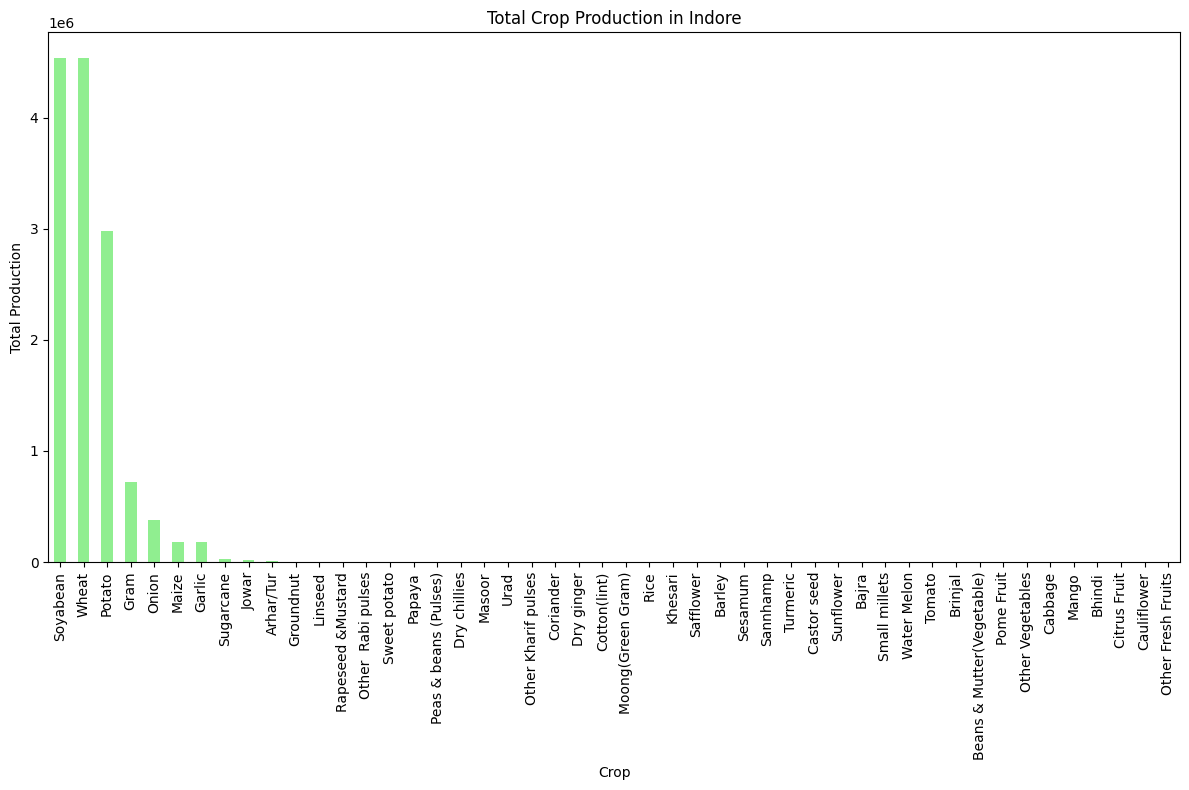

In [ ]:

# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
indore_crops_df = pd.read_csv('crop_prod_indore.csv')

# Group by Crop and calculate the total production for each crop
total_production_indore = indore_crops_df.groupby('Crop')['Production'].sum().sort_values(ascending=False)

# Plotting the total production for each crop
plt.figure(figsize=(12, 8))
total_production_indore.plot(kind='bar', color='lightgreen')
plt.title('Total Crop Production in Indore')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

### Real-time check for the moisture content using Arduino based sensor in Drip irrigation system

In [ ]:
import time

def read_soil_moisture():
    try:
        # Input the moisture level from the console
        moisture_level = float(input("Enter the current soil moisture level: "))
    except ValueError:
        # If there is a ValueError, use the last known good value
        print("Invalid input. Using the last known good moisture level.")
        return read_soil_moisture.last_value
    else:
        # Update the last known good value
        read_soil_moisture.last_value = moisture_level
    return moisture_level

# Initialize the last known good value
read_soil_moisture.last_value = 10  # Default starting value

def control_irrigation(turn_on):
    if turn_on:
        print("Irrigation ON")
    else:
        print("Irrigation OFF")

OPTIMAL_MOISTURE_LEVEL = 15

while True:
    current_moisture_level = read_soil_moisture()

    if current_moisture_level < OPTIMAL_MOISTURE_LEVEL:
        control_irrigation(turn_on=True)
    else:
        control_irrigation(turn_on=False)

    time.sleep(10)


Enter the current soil moisture level: 10
Irrigation ON
Enter the current soil moisture level: 12
Irrigation ON
Enter the current soil moisture level: 16
Irrigation OFF
Enter the current soil moisture level: 14
Irrigation ON


KeyboardInterrupt: ignored

12
## The below code works only when the arduino is connected to the system

In [ ]:
# import serial
# import time

# # Establish a serial connection to the Arduino
# # Replace 'COM3' with the correct port name
# arduino = serial.Serial('COM3', 9600, timeout=1)
# time.sleep(2)  # Give the connection a second to settle

# # Define the desired soil moisture level
# desired_moisture_level = 0.3  # This is an example value, adjust as necessary

# while True:
#     # Read the moisture level from the Arduino
#     arduino.write(b'get_moisture\n')  # The Arduino code should listen for this command
#     data = arduino.readline().decode('utf-8').strip()

#     if data:
#         # Convert the soil moisture reading to a float
#         current_moisture_level = float(data)

#         # Check if the moisture level is below the desired level
#         if current_moisture_level < desired_moisture_level:
#             # Turn on the drip irrigation
#             arduino.write(b'irrigate_on\n')  # The Arduino code should listen for this command
#         else:
#             # Turn off the drip irrigation
#             arduino.write(b'irrigate_off\n')  # The Arduino code should listen for this command

#     # Wait for a bit before reading the moisture level again
#     time.sleep(10)  # Adjust the frequency of readings as necessary

In [ ]:
# #include <SoftwareSerial.h>

# SoftwareSerial pcSerial(10, 11); // RX, TX

# const int MOISTURE_SENSOR_PIN = A0;
# const int IRRIGATION_SYSTEM_PIN = 3;

# void setup() {
#   pinMode(MOISTURE_SENSOR_PIN, INPUT);
#   pinMode(IRRIGATION_SYSTEM_PIN, OUTPUT);
#   pcSerial.begin(9600);
# }

# void loop() {
#   if (pcSerial.available() > 0) {
#     String command = pcSerial.readStringUntil('\n');

#     if (command == "get_moisture") {
#       int sensorValue = analogRead(MOISTURE_SENSOR_PIN);
#       float voltage = sensorValue * (5.0 / 1023.0);
#       pcSerial.println(voltage); // Send the moisture level to the Python script
#     } else if (command == "irrigate_on") {
#       digitalWrite(IRRIGATION_SYSTEM_PIN, HIGH); // Turn on the irrigation system
#     } else if (command == "irrigate_off") {
#       digitalWrite(IRRIGATION_SYSTEM_PIN, LOW); // Turn off the irrigation system
#     }
#   }
# }